<a href="https://colab.research.google.com/github/LeoVal1/Digit_Classification/blob/main/Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from keras import layers
import tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import Adam



#LOAD MNIST DATASET

11501568/11490434 [==============================] - 0s 0us/step


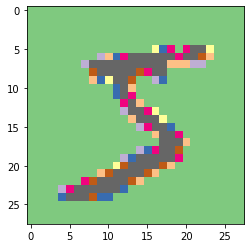

In [2]:
mnist = tf.keras.datasets.mnist
mnist_df =  mnist.load_data()
(x_train, y_train),(x_test, y_test) = mnist_df  # Load data
plt.imshow(x_train[0], cmap="Accent")
plt.show()






##PREPROCESS THE DATA INTO NUMPY ARRAYS

In [3]:
x_train_expand = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test_expand = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train_expand = x_train_expand.astype('float16')
x_test_expand = x_test_expand.astype('float16')

print(x_train_expand.shape)
print(x_test_expand.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
# normalize inputs from 0-255 to 0-1
x_train_norm = x_train_expand / 255
x_test_norm = x_test_expand / 255
x_train_expand = x_train_expand.reshape(-1, 28, 28, 1)
x_test_expand = x_test_expand.reshape(-1, 28, 28, 1)
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train_expand.shape, x_test_expand.shape)
print(y_train.shape)
num_classes = y_test.shape[1]

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10)


In [5]:
print(num_classes)

10


##BUILD A MODEL

In [6]:
model = Sequential(
    [
layers.Conv2D(filters=8,kernel_size=(5,5),strides=1,padding='same',activation='relu',input_shape=(28,28,1)),
layers.MaxPooling2D(2),
layers.Conv2D(filters=16,kernel_size=(3,3),strides=1,padding='same',activation='relu',input_shape=(14,14,8)),
layers.Flatten(),
layers.Dense(32, activation='relu'),
layers.Dense(num_classes, activation='softmax'),
  ])

In [ ]:
model.summary(),
model.reset_states(),
model.reset_metrics(),

In [8]:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics=['accuracy'])

##Without Normalization

In [9]:
history = model.fit(x = x_train_expand, y=y_train, epochs= 10 ,validation_split=0.33)

Epoch 1/10
1257/1257 [==============================] - 37s 29ms/step - loss: 0.5355 - accuracy: 0.8717 - val_loss: 0.1545 - val_accuracy: 0.9571
Epoch 2/10
1257/1257 [==============================] - 34s 27ms/step - loss: 0.1043 - accuracy: 0.9700 - val_loss: 0.1093 - val_accuracy: 0.9698
Epoch 3/10
1257/1257 [==============================] - 34s 27ms/step - loss: 0.0678 - accuracy: 0.9801 - val_loss: 0.1261 - val_accuracy: 0.9678
Epoch 4/10
1257/1257 [==============================] - 36s 28ms/step - loss: 0.0513 - accuracy: 0.9841 - val_loss: 0.1119 - val_accuracy: 0.9740
Epoch 5/10
1257/1257 [==============================] - 35s 28ms/step - loss: 0.0474 - accuracy: 0.9859 - val_loss: 0.1005 - val_accuracy: 0.9749
Epoch 6/10
1257/1257 [==============================] - 35s 28ms/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.1251 - val_accuracy: 0.9733
Epoch 7/10
1257/1257 [==============================] - 37s 29ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.1025 -

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Traning Accuracy')
print(acc)
print('Validation Accuracy')
print(val_acc)
print('Training loss')
print(loss)
print('Validation loss')
print(val_loss)

Traning Accuracy
[0.8716883659362793, 0.9700241088867188, 0.9801487326622009, 0.9840543270111084, 0.9858951568603516, 0.988059401512146, 0.9890544414520264, 0.9896763563156128, 0.9914177060127258, 0.9925371408462524]
Validation Accuracy
[0.9571233987808228, 0.9697995185852051, 0.9677793979644775, 0.9739912152290344, 0.9749002456665039, 0.9732841849327087, 0.9774758815765381, 0.9799000024795532, 0.9745972156524658, 0.977021336555481]
Training loss
[0.5355291962623596, 0.10426148772239685, 0.06779740750789642, 0.05131210386753082, 0.04740780591964722, 0.03837381303310394, 0.03470022603869438, 0.033562347292900085, 0.027398111298680305, 0.024270622059702873]
Validation loss
[0.15452855825424194, 0.10932500660419464, 0.12612655758857727, 0.11187465488910675, 0.1004565954208374, 0.12512364983558655, 0.10249560326337814, 0.10807793587446213, 0.11591940373182297, 0.12502527236938477]


In [11]:
test_loss, test_acc = model.evaluate(x=x_test_expand, y=y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss', test_loss)

313/313 [==============================] - 4s 11ms/step - loss: 0.1160 - accuracy: 0.9783

Test accuracy: 0.9782999753952026

Test loss 0.11604742705821991


In [12]:
loss = history.history['loss']
print(acc)
val_loss = history.history['val_loss']
print(val_loss)

[0.8716883659362793, 0.9700241088867188, 0.9801487326622009, 0.9840543270111084, 0.9858951568603516, 0.988059401512146, 0.9890544414520264, 0.9896763563156128, 0.9914177060127258, 0.9925371408462524]
[0.15452855825424194, 0.10932500660419464, 0.12612655758857727, 0.11187465488910675, 0.1004565954208374, 0.12512364983558655, 0.10249560326337814, 0.10807793587446213, 0.11591940373182297, 0.12502527236938477]


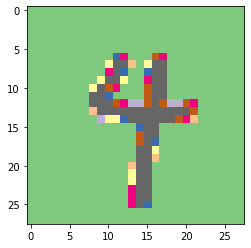

4


In [14]:
predictions = model.predict([x_test_expand]) # Make prediction
plt.imshow(x_test[565], cmap="Accent")
plt.show()
print(np.argmax(predictions[565])) # Print out the number

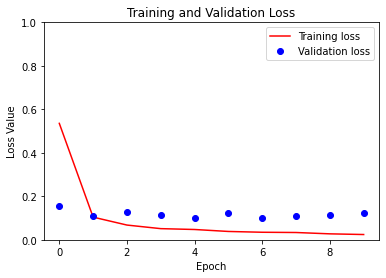

In [15]:
epochs = range(10)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

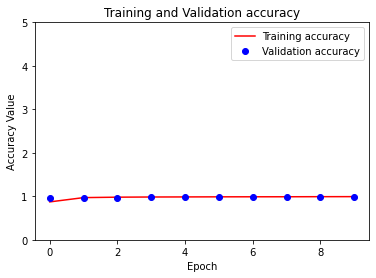

In [16]:
epochs = range(10)
plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'bo', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.ylim([0, 5])
plt.legend()
plt.show()

##With Normalization

In [18]:
history1 = model.fit(x = x_train_norm, y=y_train, epochs= 10 ,validation_split=0.33)

Epoch 1/10
1257/1257 [==============================] - 39s 31ms/step - loss: 0.2337 - accuracy: 0.9303 - val_loss: 0.0935 - val_accuracy: 0.9706
Epoch 2/10
1257/1257 [==============================] - 34s 27ms/step - loss: 0.0629 - accuracy: 0.9808 - val_loss: 0.0685 - val_accuracy: 0.9792
Epoch 3/10
1257/1257 [==============================] - 35s 28ms/step - loss: 0.0444 - accuracy: 0.9866 - val_loss: 0.0612 - val_accuracy: 0.9812
Epoch 4/10
1257/1257 [==============================] - 36s 28ms/step - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.0551 - val_accuracy: 0.9841
Epoch 5/10
1257/1257 [==============================] - 35s 28ms/step - loss: 0.0264 - accuracy: 0.9920 - val_loss: 0.0561 - val_accuracy: 0.9837
Epoch 6/10
1257/1257 [==============================] - 35s 28ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0595 - val_accuracy: 0.9835
Epoch 7/10
1257/1257 [==============================] - 34s 27ms/step - loss: 0.0163 - accuracy: 0.9944 - val_loss: 0.0548 -

In [19]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.9302719235420227, 0.9807706475257874, 0.9865668416023254, 0.9893032312393188, 0.9919898509979248, 0.9934824109077454, 0.9944028258323669, 0.995771050453186, 0.99614417552948, 0.9970895051956177]
[0.9705570340156555, 0.9792434573173523, 0.9812130928039551, 0.9840916991233826, 0.983687698841095, 0.9834856986999512, 0.9848492741584778, 0.9813645482063293, 0.9859098196029663, 0.9841422438621521]
[0.23373699188232422, 0.06293328106403351, 0.04435345530509949, 0.033279191702604294, 0.026372520253062248, 0.02052835375070572, 0.016335906460881233, 0.013643155805766582, 0.011482288129627705, 0.00869523175060749]
[0.09348676353693008, 0.06848127394914627, 0.061202336102724075, 0.05505872145295143, 0.05612574890255928, 0.059463981539011, 0.05482753366231918, 0.06913831830024719, 0.05714647099375725, 0.06654687970876694]


In [20]:
test_loss, test_acc = model.evaluate(x=x_test_expand, y=y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss', test_loss)

313/313 [==============================] - 4s 11ms/step - loss: 9.3185 - accuracy: 0.9870

Test accuracy: 0.9869999885559082

Test loss 9.3184814453125


In [21]:
loss = history.history['loss']
print(acc)
val_loss = history.history['val_loss']
print(val_loss)

[0.9302719235420227, 0.9807706475257874, 0.9865668416023254, 0.9893032312393188, 0.9919898509979248, 0.9934824109077454, 0.9944028258323669, 0.995771050453186, 0.99614417552948, 0.9970895051956177]
[0.15452855825424194, 0.10932500660419464, 0.12612655758857727, 0.11187465488910675, 0.1004565954208374, 0.12512364983558655, 0.10249560326337814, 0.10807793587446213, 0.11591940373182297, 0.12502527236938477]


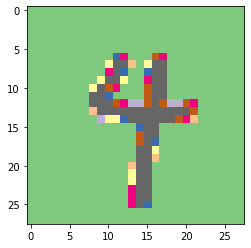

4


In [23]:
predictions = model.predict([x_test_expand]) # Make prediction
plt.imshow(x_test[565], cmap="Accent")
plt.show()
print(np.argmax(predictions[565])) # Print out the number

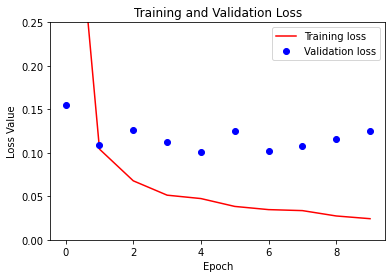

In [24]:
epochs = range(10)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 0.25])
plt.legend()
plt.show()

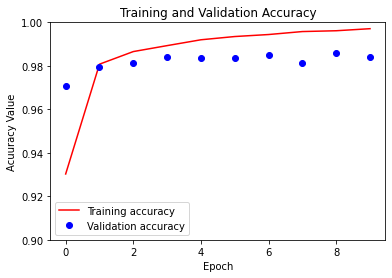

In [25]:
epochs = range(10)
plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'bo', label='Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acuuracy Value')
plt.ylim([0.9, 1])
plt.legend()
plt.show()